### Testing and Sample Usage

In [44]:
import matching
import trading
import importlib
importlib.reload(matching)
importlib.reload(trading)
from matching import MatchingEngine
from trading import TradingSystem

ME = MatchingEngine('main')

sample_sys = TradingSystem('sample', 'sp', ME)

print('Sample order book')
sample_sys.order('o', 100.50, 15)
sample_sys.order('o', 100.75, 50)
sample_sys.order('b', 100.25, 80)
sample_sys.order('o', 100.40, 40)
sample_sys.order('b', 100.30, 50)

ME.get_book()

sample_sys.order('b', 100.55, 50)
print('Matching order [bid, 100.55, 50]')

ME.get_book()

sample_sys.cancel_order('sp0002')
print('Cancel order [sp0002]')

ME.get_book()

Sample order book


,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,sp0004,50,100.3,100.40,40,sp0003
1,sp0002,80,100.25,100.50,15,sp0000
2,,,,100.75,50,sp0001


Matching order [bid, 100.55, 50]


,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,sp0004,50,100.30,100.50,5,sp0000
1,sp0002,80,100.25,100.75,50,sp0001


Cancel order [sp0002]


,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,sp0004,50,100.3,100.50,5,sp0000
1,,,,100.75,50,sp0001


### Order Generation Feature

Specify trading firms involved, ME session, qty of orders total. Default values shown, but optionally can specify [avg bid=11.50, avg_offer=12.50, stdev_price=1, avg_qty=50, stdev_qty=15].

In [59]:
import generator 
importlib.reload(generator)
from generator import OrderGenerator

ME = MatchingEngine('main')
op = TradingSystem('Optiver', 'op', ME)
js = TradingSystem('Jane Street', 'js', ME)

gen = OrderGenerator()
orders = gen.generate_orders([op, js], 10000)
gen.place_orders()

ME.get_book()


,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,op4995,44,12.11,12.31,51,op4989
1,js5000,12,12.09,12.33,64,op4970
2,js5001,53,12.00,12.36,20,op4889
3,op4985,52,11.66,12.36,22,js4988
4,js4992,63,11.61,12.4,42,op4929
...,...,...,...,...,...,...
2589,op0646,75,8.41,,,
2590,js3004,52,8.18,,,
2591,op3162,57,8.04,,,
2592,op2593,28,7.94,,,


### Replicate Feature

In case that main exchange fails, we can use the logs from main as input to a backup matching engine, which will parse the logs and replay all activity from the main engine, bringing us to the same state that the main engine was at when it failed.

In [60]:
ME_backup = MatchingEngine('backup')
ME_backup.replicate('main')
ME_backup.get_book()

,bid_ID,bid_qty,bid_price,offer_price,offer_qty,offer_ID
0,op4995,44,12.11,12.31,51,op4989
1,js5000,12,12.09,12.33,64,op4970
2,js5001,53,12.00,12.36,20,op4889
3,op4985,52,11.66,12.36,22,js4988
4,js4992,63,11.61,12.4,42,op4929
...,...,...,...,...,...,...
2589,op0646,75,8.41,,,
2590,js3004,52,8.18,,,
2591,op3162,57,8.04,,,
2592,op2593,28,7.94,,,


### Monitoring Feature

Shows plots of execution price, order and execution frequency.

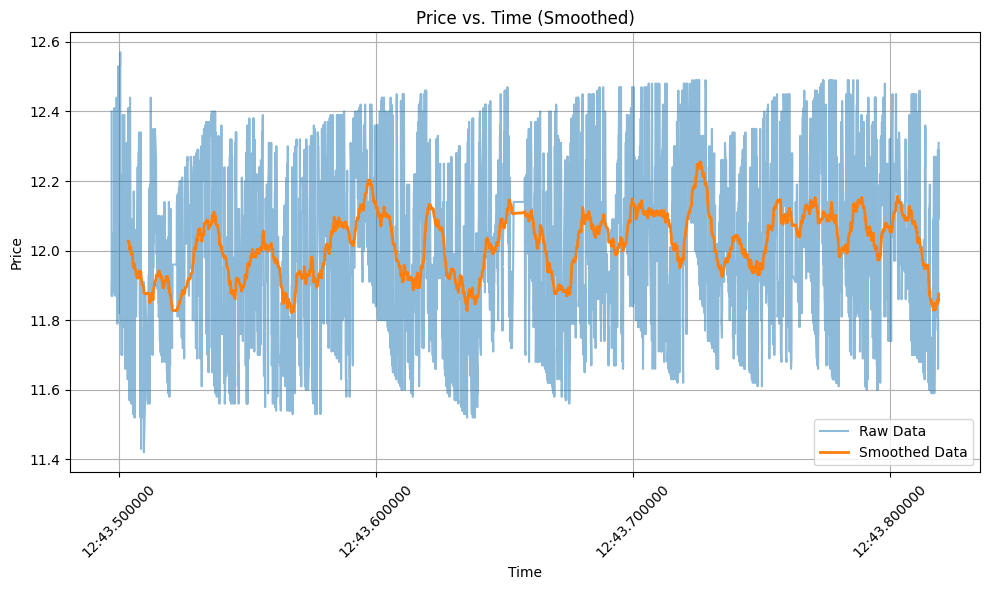

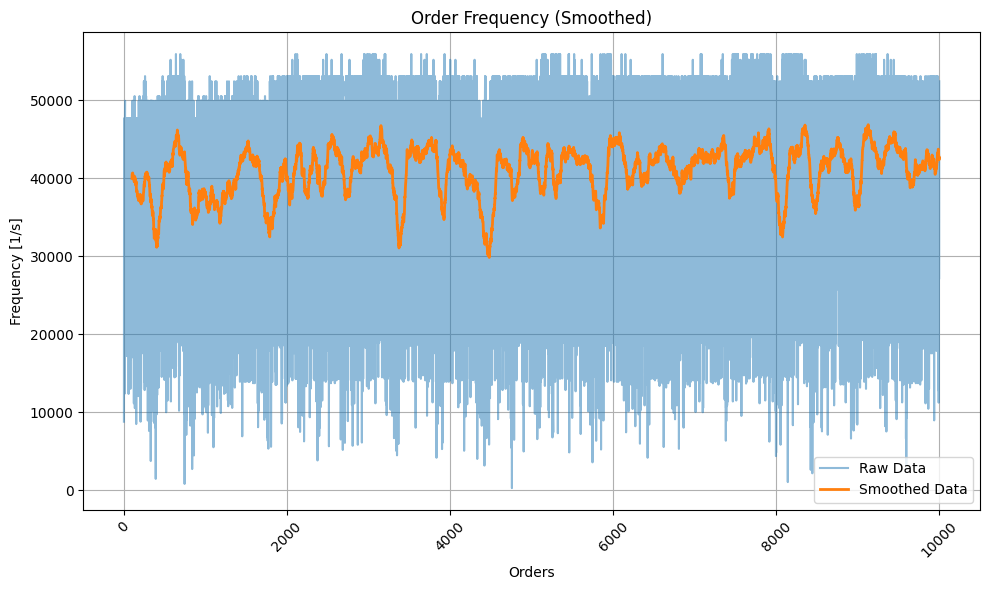

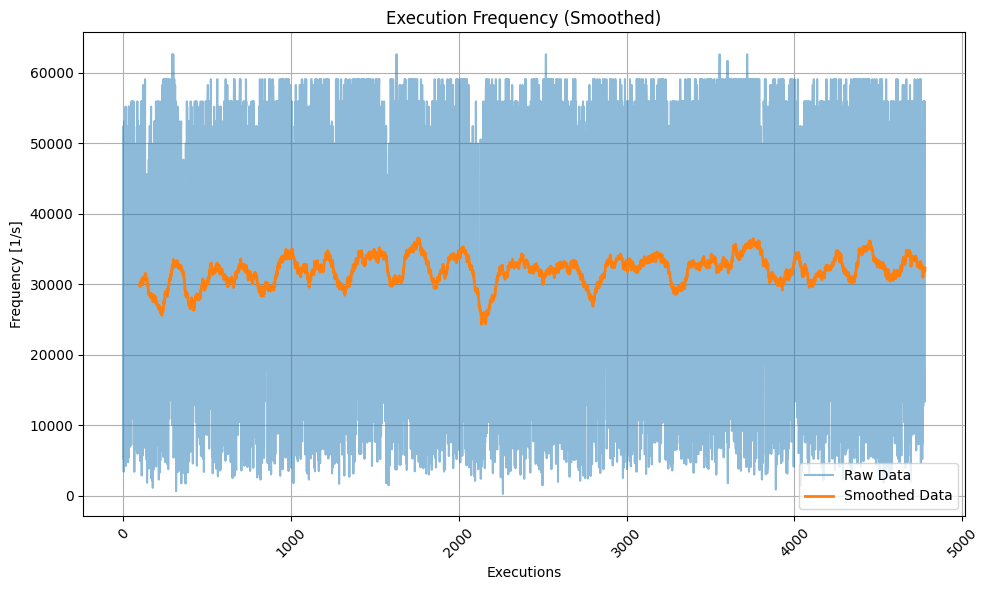

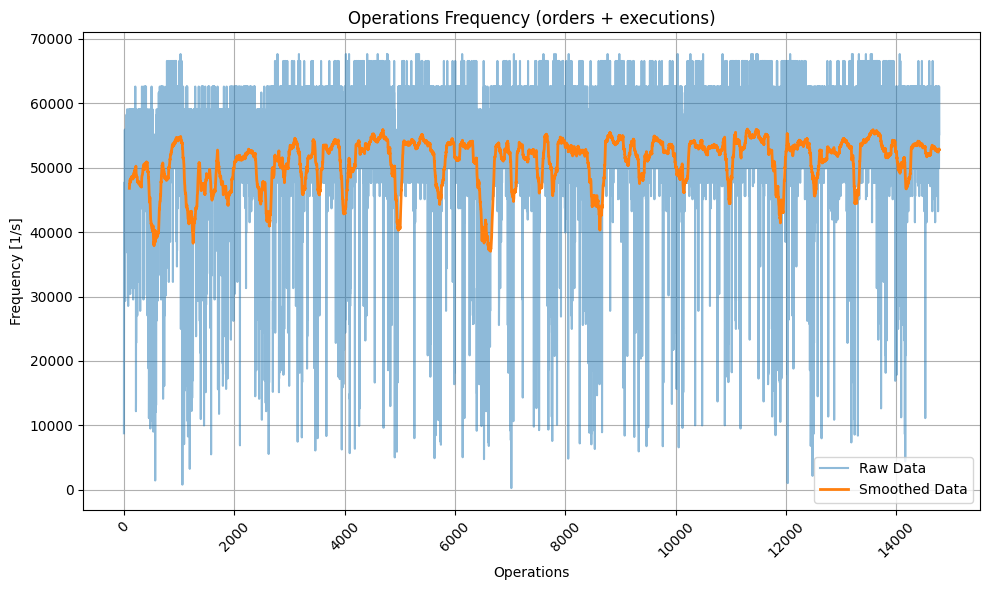

In [61]:
importlib.reload(generator)
from generator import MonitoringTools

monitor = MonitoringTools(ME)
monitor.execution_price()
monitor.order_frequency()
monitor.execution_frequency()
monitor.total_throughput()